## Puesta en práctica

In [1]:
import pandas as pd
import numpy as np

In [254]:
import warnings
warnings.filterwarnings('ignore')

In [208]:
# Obtenemos el dataset de mi repositorio de github
URL = 'https://raw.githubusercontent.com/florenciaortega/ML/master/titanic_original.csv'
df = pd.read_csv(URL)

In [209]:
df.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
110,1.0,0.0,"Foreman, Mr. Benjamin Laventall",male,30.0,0.0,0.0,113051,27.7500,C111,C,NaN,NaN,"New York, NY"
168,1.0,1.0,"Icard, Miss. Amelie",female,38.0,0.0,0.0,113572,80.0000,B28,NaN,6,NaN,NaN
690,3.0,0.0,"Brobeck, Mr. Karl Rudolf",male,22.0,0.0,0.0,350045,7.7958,NaN,S,NaN,NaN,"Sweden Worcester, MA"
208,1.0,1.0,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1.0,0.0,19928,90.0000,C78,Q,14,NaN,"Fond du Lac, WI"
814,3.0,0.0,"Gallagher, Mr. Martin",male,25.0,0.0,0.0,36864,7.7417,NaN,Q,NaN,NaN,"New York, NY"


### Entrenar el modelo

In [210]:
df.isnull().sum()

pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64

In [211]:
nan_rows = df[df.isnull().any(1)]
nan_rows

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


In [212]:
df=df.dropna(how='all')
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [213]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [218]:
impute_value = df['age'].median()
print(impute_value)
impute_fare = df['fare'].median()
print(impute_fare)

24.0
14.4542


In [219]:
df['age'] = df['age'].fillna(impute_value)
df['fare'] = df['fare'].fillna(impute_fare)
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [221]:
df['fare'].isnull().sum()

0

In [222]:
df['IsFemale'] = (df['sex'] == 'female').astype(int)
df['IsMale'] = (df['sex'] == 'male').astype(int)
df.head(5)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,IsFemale,IsMale
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1,0
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",0,1
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0


In [112]:
print('Percent of missing "Cabin" records is %.2f%%' %((df['cabin'].isnull().sum()/df.shape[0])*100))

Percent of missing "Cabin" records is 77.46%


In [115]:
# percent of missing "Embarked" 
print('Percent of missing "Embarked" records is %.2f%%' %((df['embarked'].isnull().sum()/df.shape[0])*100))

Percent of missing "Embarked" records is 0.15%


Pasajeros por puerto de embarcación (C = Cherbourg, Q = Queenstown, S = Southampton):
S    914
C    270
Q    123
Name: embarked, dtype: int64


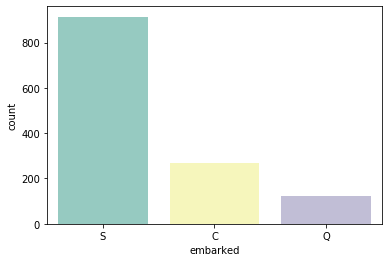

In [223]:
import seaborn as sns
print('Pasajeros por puerto de embarcación (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df['embarked'].value_counts())
sns.countplot(x='embarked', data=df, palette='Set3')
plt.show()

In [224]:
df["embarked"].fillna(df['embarked'].value_counts().idxmax(), inplace=True)

In [225]:
df.drop('cabin', axis=1, inplace=True)

In [226]:
df['TravelAlone']=np.where((df["sibsp"]+df["parch"])>0, 0, 1)
df.head(3)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked,boat,body,home.dest,IsFemale,IsMale,TravelAlone
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,S,2,NaN,"St Louis, MO",1,0,1
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,S,11,NaN,"Montreal, PQ / Chesterville, ON",0,1,0
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0,0


In [227]:
#df.drop('parch', axis=1, inplace=True)
#df.drop('sibsp', axis=1, inplace=True)
df.drop('sex', axis=1, inplace=True)

In [228]:
df=pd.get_dummies(df, columns=["pclass","embarked"])
df.head(3)

,survived,name,age,sibsp,parch,ticket,fare,boat,body,home.dest,IsFemale,IsMale,TravelAlone,pclass_1.0,pclass_2.0,pclass_3.0,embarked_C,embarked_Q,embarked_S
0,1.0,"Allen, Miss. Elisabeth Walton",29.0000,0.0,0.0,24160,211.3375,2,NaN,"St Louis, MO",1,0,1,1,0,0,0,0,1
1,1.0,"Allison, Master. Hudson Trevor",0.9167,1.0,2.0,113781,151.5500,11,NaN,"Montreal, PQ / Chesterville, ON",0,1,0,1,0,0,0,0,1
2,0.0,"Allison, Miss. Helen Loraine",2.0000,1.0,2.0,113781,151.5500,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,0,0,1,0,0,0,0,1


In [237]:
df.drop('body', axis=1, inplace=True)
df.drop('name', axis=1, inplace=True)
df.drop('ticket', axis=1, inplace=True)
df.drop('boat', axis=1, inplace=True)
df.drop('home.dest', axis=1, inplace=True)
df.drop('sibsp', axis=1, inplace=True)
df.drop('parch', axis=1, inplace=True)

In [238]:
df.sample(5)

,age,fare,IsFemale,IsMale,TravelAlone,pclass_1.0,pclass_2.0,pclass_3.0,embarked_C,embarked_Q,embarked_S
132,24.0000,79.20,0,1,1,1,0,0,1,0,0
1170,14.4542,69.55,0,1,0,0,0,1,0,0,1
846,20.0000,9.50,0,1,1,0,0,1,0,0,1
1215,14.4542,7.75,0,1,1,0,0,1,0,1,0
542,33.0000,26.00,1,0,0,0,1,0,0,0,1


In [231]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(df, random_state = 1234)

In [232]:
print(train.shape)
print(test.shape)

(981, 14)
(328, 14)


In [233]:
y = df.pop('survived')
X = df

In [234]:
X_train, y_train, X_test, y_test = train_test_split(X, y)

In [235]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(981, 13)
(981,)
(328, 13)
(328,)


In [239]:
X_train.head(3)

,age,sibsp,parch,fare,IsFemale,IsMale,TravelAlone,pclass_1.0,pclass_2.0,pclass_3.0,embarked_C,embarked_Q,embarked_S
772,17.0000,0.0,0.0,7.8958,0,1,1,0,0,1,0,0,1
523,22.0000,0.0,0.0,10.5000,0,1,1,0,1,0,0,0,1
269,14.4542,0.0,0.0,26.0000,0,1,1,1,0,0,0,0,1


In [240]:
predictors = ['pclass_1.0','pclass_2.0','pclass_3.0', 'IsFemale', 'IsMale', 
              'age','embarked_C','embarked_Q','embarked_S','TravelAlone','fare']

In [264]:
X_train = train[predictors].values
print(X_train[:2])

[[ 0.      0.      1.      1.      0.      0.75    1.      0.      0.
   0.     19.2583]
 [ 1.      0.      0.      0.      1.     14.4542  1.      0.      0.
   1.     39.6   ]]


In [265]:
X_test = test[predictors].values
print(X_test[:2])

[[ 0.      0.      1.      0.      1.     14.4542  0.      0.      1.
   1.      8.05  ]
 [ 1.      0.      0.      0.      1.     36.      0.      0.      1.
   0.     78.85  ]]


In [266]:
y_train = train['survived'].values
print(y_train[:10])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [267]:
y_test = test['survived'].values
print(y_test[:10])

[0. 0. 0. 0. 0. 1. 1. 1. 0. 1.]


In [255]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [257]:
y_predict = model.predict(X_test)
y_predict[:20]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0.])

In [258]:
from sklearn.metrics import accuracy_score
metrics.accuracy_score(y_test, y_predict, normalize=True, sample_weight=None)

0.7804878048780488

In [321]:
from sklearn.tree import DecisionTreeClassifier

SEED=1234
clf=DecisionTreeClassifier(max_depth=5, random_state=SEED)
clf

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [322]:
TCLF = clf.fit(X_train, y_train)
TCLF

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=1234, splitter='best')

In [324]:
metrics.accuracy_score(y_test, y_pred_test, normalize=True, sample_weight=None)

0.8079268292682927

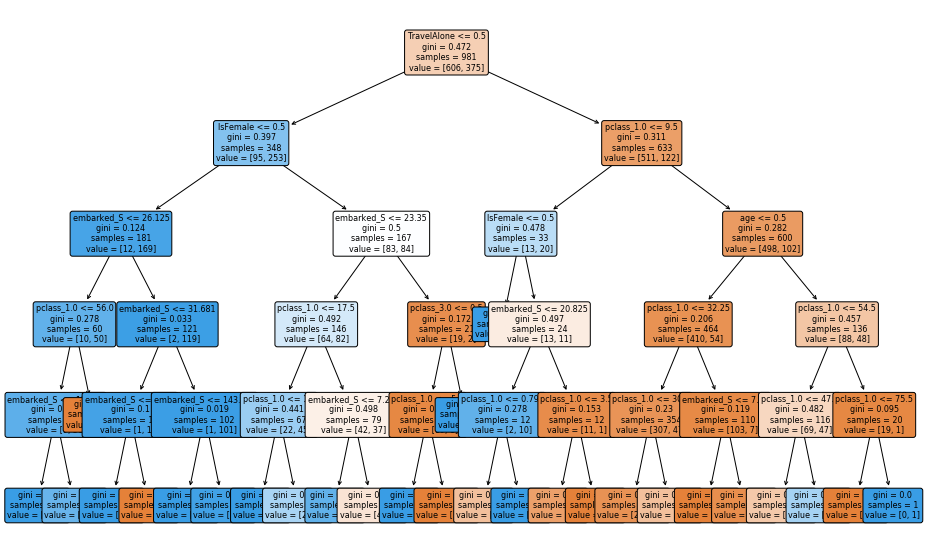

In [421]:
plt.figure(figsize=(16, 10))
plot_tree(
    TCLF, max_depth=5, feature_names=X.columns, filled=True, rounded=True, fontsize=8
)
plt.show()

In [329]:
importances = TCLF.feature_importances_
indices = np.argsort(importances)[::-1]
feat_imp = list(zip(np.asanyarray(X.columns)[indices], importances[indices]))
feat_imp_df = pd.DataFrame(feat_imp, columns=['feature', 'importance'])
print(feat_imp_df)

        feature  importance
0   TravelAlone    0.551570
1      IsFemale    0.155180
2    pclass_1.0    0.143132
3    embarked_S    0.092076
4           age    0.050646
5    pclass_3.0    0.007396
6    embarked_Q    0.000000
7    embarked_C    0.000000
8    pclass_2.0    0.000000
9        IsMale    0.000000
10         fare    0.000000


In [410]:
from sklearn.ensemble import RandomForestClassifier

clf_forest = RandomForestClassifier(n_estimators=8,min_samples_leaf=1, max_depth=4,min_weight_fraction_leaf=0.15, criterion='gini')
clf_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=4, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.15, n_estimators=8,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [413]:
y_pred_RF = clf_forest.predict(X_test)

In [414]:
metrics.accuracy_score(y_test, y_pred_RF, normalize=True, sample_weight=None)

0.7835365853658537

## cross validation

In [432]:
from sklearn.model_selection import cross_val_score

model = LogisticRegression()

In [433]:
scores = cross_val_score(model, X_train, y_train, cv=4)
print(scores)
print(scores.mean())

[0.78455285 0.8122449  0.76734694 0.77959184]
0.7859341297494608


In [434]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [435]:
y_cv_pred=model.predict(X_test)

In [436]:
metrics.accuracy_score(y_test, y_cv_pred, normalize=True, sample_weight=None)

0.7804878048780488

## Grid Search _ Random Forest

In [437]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':np.arange(3,11,2),
              'max_depth':np.arange(3,6),
              'min_weight_fraction_leaf':np.arange(0,0.4,0.1),
              'criterion':['gini','entropy']}

rfclf = RandomForestClassifier()
grid = GridSearchCV(rfclf, param_grid, scoring='precision')

grid.fit(X_train,y_train)

print("Forest best parameters :",grid.best_params_)
print("Forest best estimator :",grid.best_estimator_ )
print("Forest best score :",grid.best_score_ )

Forest best parameters : {'criterion': 'gini', 'max_depth': 5, 'min_weight_fraction_leaf': 0.2, 'n_estimators': 9}
Forest best estimator : RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.2, n_estimators=9,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Forest best score : 0.8613668970914308


In [438]:
y_predict_gs=grid.predict(X_test)

In [439]:
grid.best_score_

0.8613668970914308

## Grid Search _DecisionTreeClassifier

In [444]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [445]:
tree_model=DecisionTreeClassifier()

In [464]:
param_grid= { 'max_depth':np.arange(3,6),
              'splitter': ['best', 'random'],
              'criterion':['gini','entropy']}

grid = GridSearchCV(tree_model, param_grid, scoring='precision')

grid.fit(X_train,y_train)

print("Forest best parameters :",grid.best_params_)
print("Forest best estimator :",grid.best_estimator_ )
print("Forest best score :",grid.best_score_ )

Forest best parameters : {'criterion': 'gini', 'max_depth': 3, 'splitter': 'random'}
Forest best estimator : DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')
Forest best score : 0.8305562965562965


In [465]:
y_predict_GS = grid.predict(X_test)

In [466]:
metrics.accuracy_score(y_test, y_predict_GS)

0.8079268292682927

In [523]:
tree_model=DecisionTreeClassifier(criterion='gini', max_depth=3, splitter='random')
tree_model.fit(X_train, y_train)
y_prediccion=tree_model.predict(X_test)
metrics.accuracy_score(y_test, y_predict)

0.7804878048780488

In [490]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predict_GS)

accuracy = sum(cm[i][i] for i in range(2)) / y_test.shape[0]

print("accuracy = " + str(accuracy))

accuracy = 0.8079268292682927


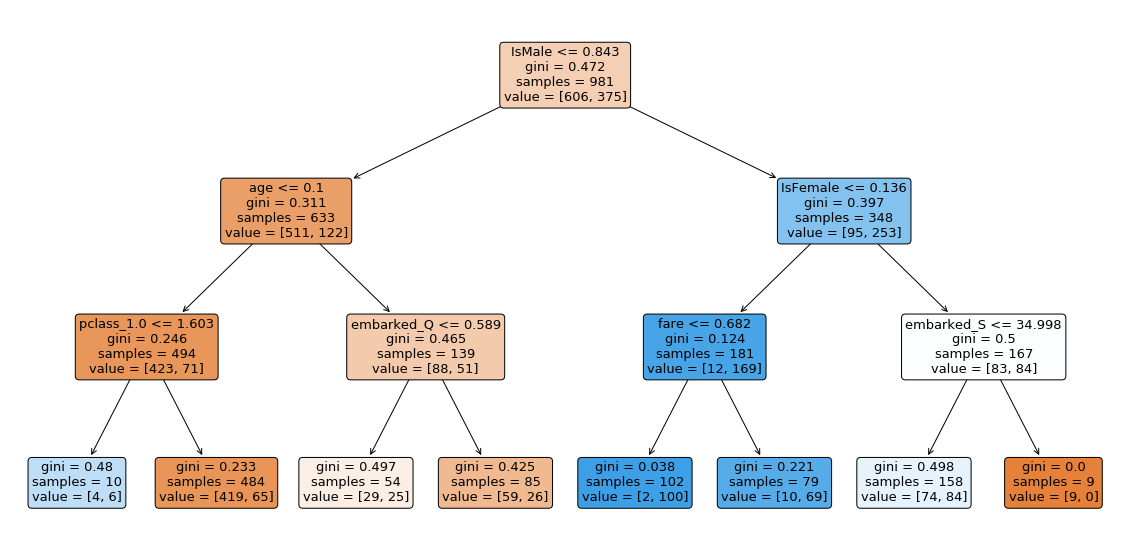

In [520]:
plt.figure(figsize=(20, 10))
plot_tree(tree_model, max_depth=10, feature_names=X.columns, filled=True, rounded=True, fontsize=13)

plt.show()

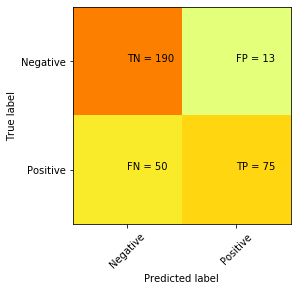

In [524]:
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Wistia)
classNames = ['Negative','Positive']
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation=45)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()